In [1]:
import os
import pathlib
import urllib

import PIL.Image as Image

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

## Load a pre-trained model from TF hub

In [2]:
# this info comes from the documentation of the model in tf hub: check the model_url link
IMAGE_SHAPE = (224, 224)

model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

# load the model from tf hub
classifier = Sequential([hub.KerasLayer(model_url,
                                        input_shape=IMAGE_SHAPE+(3,))]) # here add the 3rd dimension for the channel

In [3]:
# the original classes of the classifier
imagenet_labels_url = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
file = urllib.request.urlopen(imagenet_labels_url)

imagenet_labels = []

for line in file:
    imagenet_labels.append(line.decode("utf-8")[:-1])

print(len(imagenet_labels))    
    
imagenet_labels[:10]

1001


['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

## Test the pre-trained model on images from the web

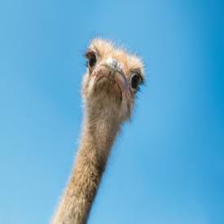

In [4]:
# Try the model with some image from the web
urllib.request.urlretrieve(
    "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBw8PDw8PDw8PDg8PDw8PDw8QDw8PDw0NFREWFhURFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGBAQFy0fHyAtLS0vLSsrLS0tKy0tLS0tLS0tLS0tLS0tLS8tLSstLS0tLS0tLSsrLS0tLSstLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAADAQADAQAAAAAAAAAAAAABAgMABAUGB//EADQQAAICAAQEBAQGAgIDAAAAAAABAhEDBBIhBTFBURMiYXEGgZGhMrHB0eHwQlJy8QcUI//EABoBAAIDAQEAAAAAAAAAAAAAAAECAAMFBAb/xAAiEQEBAAICAgICAwAAAAAAAAAAAQIRAwQSITFBBRMiQlH/2gAMAwEAAhEDEQA/APQGMA23nmFYwGECgCAiMBmMECgGYAgBjGIDUag0GiJoEh0jJDJEGRkg0GjAHQUahgAEKBQwAoVoVjMDIBGibRRisYqMkTmi8kSkhoSxx5IlNHIkiUkNFVjjyRGSOTJEZDRXYiyckVkTkMSpUYajBJp7MAWA4mqAAsAUBgYQMKFZjMBAYAQBBggCRBQyFQWwCdDISEJPdJvZv6FZYM1zXoxfKfGzzjy1vQGG0MzRNp40pjGCUABAFAYrGYrIBWKx2KEE2TkizROSGhKhJEpo5EiMxorrjyIyLzIyHiqoyJSKzJSHinKkMEwQeyAMA4WqUDGYrCgMAQMKAAICAAAgCDBQEMQGsvkMPXJbpd7aVL2OFj2laTfpZ5fiXHMzhzcYxUNNtOUVLV6LfZ/ycva5v14evmu7pcE5M92+o+qQ8LCfhtrdKn0vopev5nYYkMOUV5U+/tyPkPw/8VY+ak8rjNTbjKWG2oveKvSpKmn+x7fguexnFYc1LV/s99SvZmByZ54+9vQ4YY309BicOg997rl0f8nU5zK6W9t+b7RXZHfYUZz2TqtlX5knOEZOMlyfVO7a3LuPuZYXd+FPJ1cc5qPOywH12SSfqRlh1/PY9RjrDkn5effr8voddicNc7ad1Wz6Jndxd/HK6rg5fx1mO46RsB2eJwrEVyavql+SOA8Ca5qttzuw5sM/is/k6+eHzEgMZgLnORijsVhArJyKMSQ0LUpEZl5EZjRXUJkJnImQmPFOTjzJSZaZBlkc+VAwDE0Hk9sKxgM4WwRgYzQrQQKAZisIAxQgCWsAxggIUKGyCEr/ALt9zzHxRl8fFwMVKMttDjFqNSjvqUZdX+Hbtex67L4DxHpXM5PxDwuX/qxwoyubxYtc7Tr+Tg73LMcNb9tL8fxW5+WvT53/AOPPhbEnjwxcTVFR83Pm2uvVL1PremODvHD8WX+2qMVv2T3OkUp5PAuOG6jFrEm4x14mI/w6V067duZ5vH41iLEbnNym6XhrU2l7JbGJll5N/Hj8Xu8v8WxhqhPDeHK6trZtvujg8X49JytLbElpWmpQpLzN9UeE4lxibjpjaxHsk+nrvzJ5XPa8TSpSglHzuOzk6+w2Gdk9qssPfp9Vy8sOUXpltHSruP4qTarsSy2bqUoy5dPZOvr+54bEx8xhacSE/Ehh8k0tVVXmraSOdm+KeLBTg1GE7WzVqSW8V17FWeE9ZYxdhl6sye4jxOHJO66Xt82cTO4uFjJ1OLa5pNb+6W7PknGOIwy6UZ47lN7xwowWJLDT/wBuSX3OT8H/ABXGONpntGacVWpxlL0T5Pfkzo4/PC725+TxymtPYS5tc/WmvzMNiYqk9Stp79aFPQ4XeMea5JrKwrAxmKx1ZWJIdiSGhalIlMrIlMaKqjMhMvMhMeK8kMQhIvMhMsjmzIY1GCre3AExntsrQGhgBRNoRos0I0EtiTAUaEaGLYUATBKxrMYgx2fBaUr5vp2o5mFirMY9NPRD0qLZweHLUmkknzb3WwcTNywYz5J8klz/AOjB72V/Y9H0sZOKOu+O+MRU44UG1S06k6cG+bXrVHhp8RjhqSwoJO9pPecn3s5XGlLGxddPZuue7ZxHklbcqtfr+pxfLtcLMZqc617t0v8Aj6jZZyc7jJxjvs3e3Re+33EzGWepST8vL3DLVHflX7EGO64fxCSWz2T0yi23TSFhiVraXlbUqul+JKv49Dq8jiaseMbSU4yT7urcf1O4eBFucGttovo0mvx/qW4ZamqGU8vbw3xBqlmsVytNzv5Plv1PRcI4FiYuHHTopTU5bptTXJNdOf3OVh4M8bTCbhUdnJwUm4d0er4Vw2GErw2/Nu7epSfe+ZodXhnJd5fEZXc57xzxx+atw7DlGCjK00vlfozmmSMakmvUZFtt3SsVjsVhKRk5FGJIaEqUiUisiUhldRmRmWkSmh4ryceZGSLzRGSLI5s4kYJhlb2wBjGc2ygGARCsDQwKCBGhWilCtBTSTQtFWhWhtksTMhmgUErn8MtO6T92lRwONTWq657bWzkZF+au/Ujx16Vd17/uZPfk3tufj7/F5vN4iVqLr8/mdZPaSTd36/VnJlLzNtUr7rcfCwIybk41+favQy9NRx5wtU1/eb/vqSzOWck9/wDX7L+TsZPZWqSjz7uv5OFKTTfZp3y2abQdBtxeFZVeOsRr8C236uzsuJY2iUKtanV86a79wYWmK1cm3y+pHPYjnS7bp/kPjC26dxkMCpW0mqvkrVnfYKVKlXsdfksPZdHz+vNf3sdnBG51sPDjjA7efnyNQGMBnQ5SMVjsRhKVk5DyJyGhanIlIpInIaK6lIjItIlIeEqMyMkciSJSQ8UZRBow2kIynT2ZqDRjObZTDAoKFFoegBAgGOBkAjQrQ7RqCidA0lKBQdh4uRw3B3v6HH+IsO4vlGlvdWdlkMOuqX3Or+I4uca0xe3+Se7XoYne5N5PQdHj1g8xhYMXOk+e189+9v8ARHYxyabrSqT5u1TXKvqvudbksNqe6UZLkqVrbmdn4/laW20oupda9OpwbdunUZyD1c+my250nt8jqpy8z9n/ACdlxPFV7Vs6tdNqX5HX5fCcpKO+73fYtxmyZenMy2Wlib1arp3O8wuEqveyfDcpoex30I7GxwdbGY7s9sbs9rLy1jfTj5TA0pJ77HJCCztZ22AaxWyJtmIwtisMLSyJSHkychoSkkSkUkJIYlSkTkirEY0JUmickVaFaGiuxCjFKCNsni9dQKGoxntYpg0agoVoWh6A0ECUahqBRAJRqGo1BQrQcJK9/pVmZbLYGprp32dC55SQ/HjcspI5kUlG1t358jquJzqvNF+jTbrt3s5udx3Hyp0uj6e9/odPKPiK4Olu296bSt1t1o8zz8nnnbHqOHDxwkdBmXLxLa35Nro+thxcWqapXa3fL+7FuPYUMGFf5On1fv8AO9R0OZzuyp2q69qJjNjbovEJuU2+W6pbM7fgWS21O/T2OoykPEmvWnaPaZTCSil2SNPpcPlfK/TN73P4zxn25GDh/wDZcEQmsxLWYtmYrYS2i2K2ZsDCANithYrCBWJIZiMYlJIRjsRhKRk2irEY0LU2I0VaEaCSxMwxgg9dQKGMcDUKYagUEC0ChwEQtAoegUHYaToBRoVoIEOwyipepxMLDbZyNck0kvl0vocHf5vDDX+tL8dw+We79IZ/EcYtvareyul+55/MY2Ip3TSlNRWqk3s0o18l9Tu83Nt7qEdPmnTb0+r+VnW8VxFPdVUVpUlv4Vp+b1dvcwJW9XmeNZy4y13CblJU91KntNdlyPJYuO9XqttvY9RxfMQzEZpv8Dmlq8kpLamr5r5nluHZCWLjaI7b9d/mdfDjv05uXLXuvYfC2X8utp79Ox6rBgcLhOV8OEV2S3/c7SKPQ8XH4YSPOc/L+zO1jBMyxSRisditBhbCAC0BjFKxWMxWECsVjMDCCbEaKNCsJamxGUaEaDC0jA0FgsYpaMGzEB6ww1Ao4WkABqMRCmoNGIhaNQTBArQtFKLZfBTe6BllMZumwwuV1Gwo6Yunu19zgeJKEpW6lKXl5vZKztcRxctL2Ua3W251mczsVr0NXuodX+zPOdrlvLnv6el6/FOLDTiY+dw4xmlcpSmoya8zl329P3Olzs95xxKcsSeHoSryYVPmvpzOVPW28WmoKXh6Vu1f+arpdHmM5nKniTbjKbWnm04yt6d/Qpwx2tyricZwZRdQ8OWFDEaajHlvtf57Hb/C2QpvEqk7S7pHn8v4mJmVH/byyS5OL/rPouQyqhCKS5Gz0OH3536Y/wCQ5tY+E+3Kw4JIo0FINGoxyGDRgoRoDQ9AZESaFaKMVoYlTaFZRoDQSpMVlWhXEiJNAaKUBoYukWibRZoRoJai0IyzQjQ0pakYagkLp641DNAo4GpoKBQ4KDsNFoFD0CggWgUPRoxIg4ULZ2uDhVFt79q6slk8vdfcrmsZJpL2VdDM7vP/AFjX6XBr+VcGaTW6UluqrzSfWjg5zDhPySSUIqlS3tU9vTkjsMzieGk73Sainu1tbZ5/L5xXKUvPiOpb8oR3e/ptZlaaWy5nEwU4YalJbScnHy3t9t2z5zxWPmm8NbSdyUpbutt+9Hq+J5iL0Ti2oPVdronv939jy+XwJY+PGHTZt+lIv4OO5ZairlzmONtd58I8M0//AFkt5Lb0R7KESGSwFGMUlskl7HMo9FhhMMZjHm+TO8mVypaBQ9AoYhKBQ9AaCBGKyjQtEBOgUUoFBTSbQrRVoDiHZbEqFaLaRWg7LpKgOJVxFoOw0hKIkonJaJSiGULHHaEaLyQjQxLEaMUowdhp6pmRjHA0xo1AMQGoDMYINRyMth2zGE5LrGreDGXObdrFKMfVnV5/F8NpyW85NbdNrAYwc7u7rfxmvTr8/g6opyfpatO+Z1GaSjHFmvLKcXH0quZjCUXhuJ4+mOlN8/N6p6Wv1O7+DMjqXivndL2MY1OjjPJm9/KzB7OEB6MY02TpqBRjEQrFZjDFBgoBggNG0mMRA0g0mMRA0gcTGIhdIHExghoHEnOJjBlCxx5IRmMWKaWgGMEr/9k=",
    "ostrich.png")
  
ostrich = Image.open("ostrich.png").resize(IMAGE_SHAPE)
ostrich

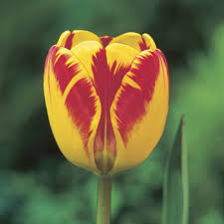

In [5]:
# Try the model with some image from the web 
urllib.request.urlretrieve(
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-E7boOq25EVzmEcpPTRT_WCGfHk4KSaUJOg&usqp=CAU",
    "flower.png")

flower = Image.open("flower.png").resize(IMAGE_SHAPE)
flower

In [6]:
# Normalize
ostrich = np.array(ostrich)/255.
ostrich.shape

(224, 224, 3)

In [7]:
# Normalize
flower = np.array(flower)/255.
flower.shape

(224, 224, 3)

In [8]:
# Collect the 2 images together
test_set = np.array([flower, ostrich])
test_set.shape

(2, 224, 224, 3)

In [9]:
# The ImageNet classifiers understands those as a type of flower and an ostrich
y_pred = classifier.predict(test_set)
pred_labels = list(np.argmax(y_pred, axis=1))
[imagenet_labels[i] for i in pred_labels]

["yellow lady's slipper", 'ostrich']

In [10]:
# BUT the flower was supposed to be a tulip! 
# And tulip is not a class in the original classifier!
"tulip" in imagenet_labels

False

## The target dataset: 5 types of flowers

In [11]:
# Load some other flowers images with their labels
data_dir = pathlib.Path("./flowers")

pictures = [list(data_dir.glob('daisy/*')), 
            list(data_dir.glob('rose/*')),
            list(data_dir.glob('tulip/*')),
            list(data_dir.glob('dandelion/*')),
            list(data_dir.glob('sunflower/*'))]

flowers = ['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']

num_of_classes = 5

In [12]:
# Prepare train and test set of the new images
X, y = [], []

for i, images in enumerate(pictures):
    for image in images:
        img = Image.open(str(image)).resize(IMAGE_SHAPE)
        X.append(np.array(img))
        y.append(i)
        
X = np.array(X) / 255.
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, 
                                                    shuffle=True, random_state=0)

In [13]:
len(X_train)

431

## Test the pre-trained model on the target test data

In [14]:
# How does the imagenet classifier perform on the flowers?
y_pred = classifier.predict(X_test)
pred_labels = list(np.argmax(y_pred, axis=1))
cmp = zip([imagenet_labels[i] for i in pred_labels], [flowers[i] for i in y_test])
list(cmp)[:10]

[('daisy', 'dandelion'),
 ('plastic bag', 'rose'),
 ('mailbox', 'tulip'),
 ('daisy', 'daisy'),
 ('daisy', 'sunflower'),
 ('daisy', 'sunflower'),
 ('pretzel', 'tulip'),
 ('ear', 'dandelion'),
 ('pot', 'rose'),
 ('daisy', 'sunflower')]

## Build and train a baseline classifier

In [15]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_of_classes))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)      

In [16]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=7,
          # x_test and y_test are used for monitoring only, NOT for training
          verbose=True, validation_data=(X_test, y_test))

Epoch 1/7
14/14 [==============================] - 104s 8s/step - loss: 1.6948 - acc: 0.2274 - val_loss: 1.5795 - val_acc: 0.2419
Epoch 2/7
14/14 [==============================] - 87s 7s/step - loss: 1.4920 - acc: 0.3457 - val_loss: 1.3447 - val_acc: 0.4220
Epoch 3/7
14/14 [==============================] - 86s 7s/step - loss: 1.2617 - acc: 0.4617 - val_loss: 1.2885 - val_acc: 0.4514
Epoch 4/7
14/14 [==============================] - 82s 6s/step - loss: 1.1568 - acc: 0.5290 - val_loss: 1.3338 - val_acc: 0.4393
Epoch 5/7
14/14 [==============================] - 79s 6s/step - loss: 1.0402 - acc: 0.5661 - val_loss: 1.3499 - val_acc: 0.5008
Epoch 6/7
14/14 [==============================] - 81s 6s/step - loss: 1.0382 - acc: 0.5940 - val_loss: 1.2883 - val_acc: 0.5221
Epoch 7/7
14/14 [==============================] - 84s 6s/step - loss: 0.8177 - acc: 0.6705 - val_loss: 1.3956 - val_acc: 0.5471


## Build and train the transfer learning

In [17]:
# TRANSFER LEARNING with freezed layers
model = Sequential([
    hub.KerasLayer(model_url, input_shape=(224, 224, 3), trainable=False),
    Dense(num_of_classes)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_2 (Dense)             (None, 5)                 5010      
                                                                 
Total params: 3,545,275
Trainable params: 5,010
Non-trainable params: 3,540,265
_________________________________________________________________


In [18]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=7,
          # x_test and y_test are used for monitoring only, NOT for training
          verbose=True, validation_data=(X_test, y_test))

Epoch 1/7
14/14 [==============================] - 115s 8s/step - loss: 1.7458 - acc: 0.3828 - val_loss: 1.0997 - val_acc: 0.6001
Epoch 2/7
14/14 [==============================] - 100s 8s/step - loss: 0.7190 - acc: 0.7309 - val_loss: 0.7487 - val_acc: 0.7344
Epoch 3/7
14/14 [==============================] - 91s 7s/step - loss: 0.4851 - acc: 0.8237 - val_loss: 0.6481 - val_acc: 0.7707
Epoch 4/7
14/14 [==============================] - 90s 7s/step - loss: 0.3530 - acc: 0.8747 - val_loss: 0.6108 - val_acc: 0.7828
Epoch 5/7
14/14 [==============================] - 92s 7s/step - loss: 0.2802 - acc: 0.9072 - val_loss: 0.5774 - val_acc: 0.7998
Epoch 6/7
14/14 [==============================] - 94s 7s/step - loss: 0.2309 - acc: 0.9420 - val_loss: 0.5632 - val_acc: 0.8052
Epoch 7/7
14/14 [==============================] - 91s 7s/step - loss: 0.1944 - acc: 0.9536 - val_loss: 0.5506 - val_acc: 0.8083


## Test the model obtained from transfer learning

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       689
           1       0.80      0.78      0.79       703
           2       0.80      0.80      0.80       887
           3       0.84      0.88      0.86       941
           4       0.77      0.74      0.75       666

    accuracy                           0.81      3886
   macro avg       0.81      0.80      0.80      3886
weighted avg       0.81      0.81      0.81      3886

[[568  13  23  60  25]
 [ 13 551  97  11  31]
 [ 17 104 707  24  35]
 [ 40  10  14 824  53]
 [ 58  11  48  58 491]]
0.8082861554297478


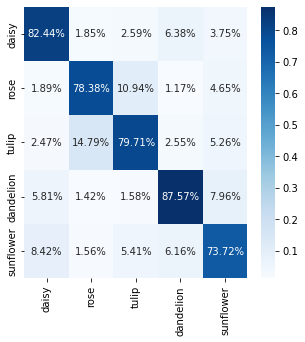

In [19]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

confusion_ma = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_ma)
print(accuracy_score(y_test, y_pred))


fig = plt.figure(figsize=(num_of_classes, num_of_classes))
sns.heatmap(confusion_ma/np.sum(confusion_ma, axis=1), annot=True, fmt='.2%', cmap='Blues',
            xticklabels=flowers, yticklabels=flowers)
plt.show()

In [20]:
# Now the classifier recognizes the tulip!
y_pred = model.predict(flower[np.newaxis, ...])
y_pred = np.argmax(y_pred)

flowers[y_pred]

'tulip'